In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Data-Sets-For-Machine-Learnig-and-Data-Science/master/DataSets/teleCust1000t.csv')

In [3]:
df.tail(4)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3
999,3,50,36,1,7,39.0,3,3,0.0,1,3,2


In [4]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [12]:
#data visuvalization and Anylisis
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3afe01fe80>]],
      dtype=object)

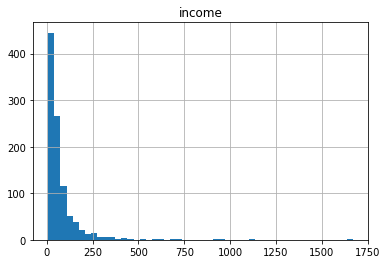

In [13]:
df.hist(column='income',bins=50)

In [14]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [19]:
x=df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']]
x[0:5]

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4


In [18]:
y=df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

In [20]:
#normalization Data
x=preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [21]:
#Trine Test Split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, auc, log_loss

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [25]:
x_trine,x_test,y_trine,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
print('Trine set:',x_trine.shape,y_trine.shape)
print('Test set:',x_test.shape,y_test.shape)

Trine set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [26]:
#Classification KNN
from sklearn.neighbors import KNeighborsClassifier

In [28]:
#Trining
k=4
#trine model and predict
neigh=KNeighborsClassifier(n_neighbors=k).fit(x_trine,y_trine)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [29]:
neigh.classes_

array([1, 2, 3, 4])

In [30]:
trine_score=neigh.score(x_trine,y_trine)
trine_score

0.5475

In [31]:
test_score=neigh.score(x_test,y_test)
test_score

0.32

In [32]:
neigh.weights

'uniform'

In [33]:
yhat=neigh.predict(x_test)
yhat[0:4]

array([1, 1, 3, 2])

In [34]:
pd.DataFrame({'Acutual Data':y_test,'New_prediction':yhat})

,Acutual Data,New_prediction
0,4,1
1,1,1
2,1,3
3,2,2
4,4,4
...,...,...
195,2,4
196,3,1
197,3,4
198,2,3


In [35]:
#Accuracy Evaluation
from sklearn import metrics
print("Trine Set Accuracy:",metrics.accuracy_score(y_trine,neigh.predict(x_trine)))
print("Test Set Accuracy:",metrics.accuracy_score(y_test,yhat))

Trine Set Accuracy: 0.5475
Test Set Accuracy: 0.32


In [ ]:
# k value changes

In [46]:
x_trine,x_test,y_trine,y_test=train_test_split(x,y,test_size=0.25,random_state=4)
print('Trine set:',x_trine.shape,y_trine.shape)
print('Test set:',x_test.shape,y_test.shape)

Trine set: (750, 11) (750,)
Test set: (250, 11) (250,)


In [47]:
#pratice for changing the k value incresasing the accuracy of model
#Trining
k=6
#trine model and predict
neigh=KNeighborsClassifier(n_neighbors=k).fit(x_trine,y_trine)
neigh


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [48]:
neigh.classes_

array([1, 2, 3, 4])

In [49]:
trine_score=neigh.score(x_trine,y_trine)
trine_score

0.5173333333333333

In [50]:
test_score=neigh.score(x_test,y_test)
test_score

0.316

In [52]:
# what about other k
ks=20
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))
ConfustionMx=[];
for n in range(1,ks):
    # trine model and predict
    neigh=KNeighborsClassifier(n_neighbors=n).fit(x_trine,y_trine)
    yhat=neigh.predict(x_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.296, 0.3  , 0.304, 0.332, 0.34 , 0.316, 0.356, 0.332, 0.356,
       0.344, 0.344, 0.348, 0.344, 0.364, 0.336, 0.356, 0.356, 0.336,
       0.328])

In [53]:
std_acc

array([0.02887102, 0.02898275, 0.02909185, 0.02978429, 0.02995997,
       0.02940367, 0.03028293, 0.02978429, 0.03028293, 0.03004423,
       0.03004423, 0.03012613, 0.03004423, 0.03043051, 0.02987333,
       0.03028293, 0.03028293, 0.02987333, 0.02969283])

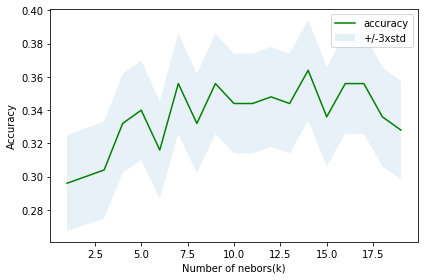

In [57]:
#plot model accuracy for different number of neighbors
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.legend(('accuracy','+/-3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of nebors(k)')
plt.tight_layout()
plt.show()

In [59]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,recall_score,classification_report,r2_score

In [60]:
mean_absolute_error(y_test,yhat)

1.212

In [61]:
mean_squared_error(y_test,yhat)

2.532

In [62]:
accuracy_score(y_test,yhat)

0.328

In [63]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           1       0.34      0.45      0.39        64
           2       0.31      0.29      0.30        51
           3       0.33      0.31      0.32        70
           4       0.33      0.25      0.28        65

    accuracy                           0.33       250
   macro avg       0.33      0.33      0.32       250
weighted avg       0.33      0.33      0.32       250



In [64]:
cm=confusion_matrix(y_test,yhat)

In [65]:
import seaborn as sns

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


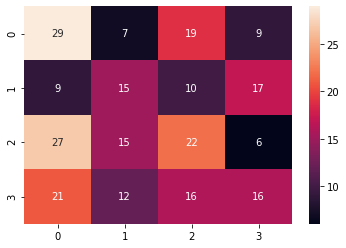

In [66]:
sns.heatmap(cm,annot=True)

In [67]:
r2_score(y_test,yhat)

-0.9780260986950648